In [2]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

<IPython.core.display.Javascript object>


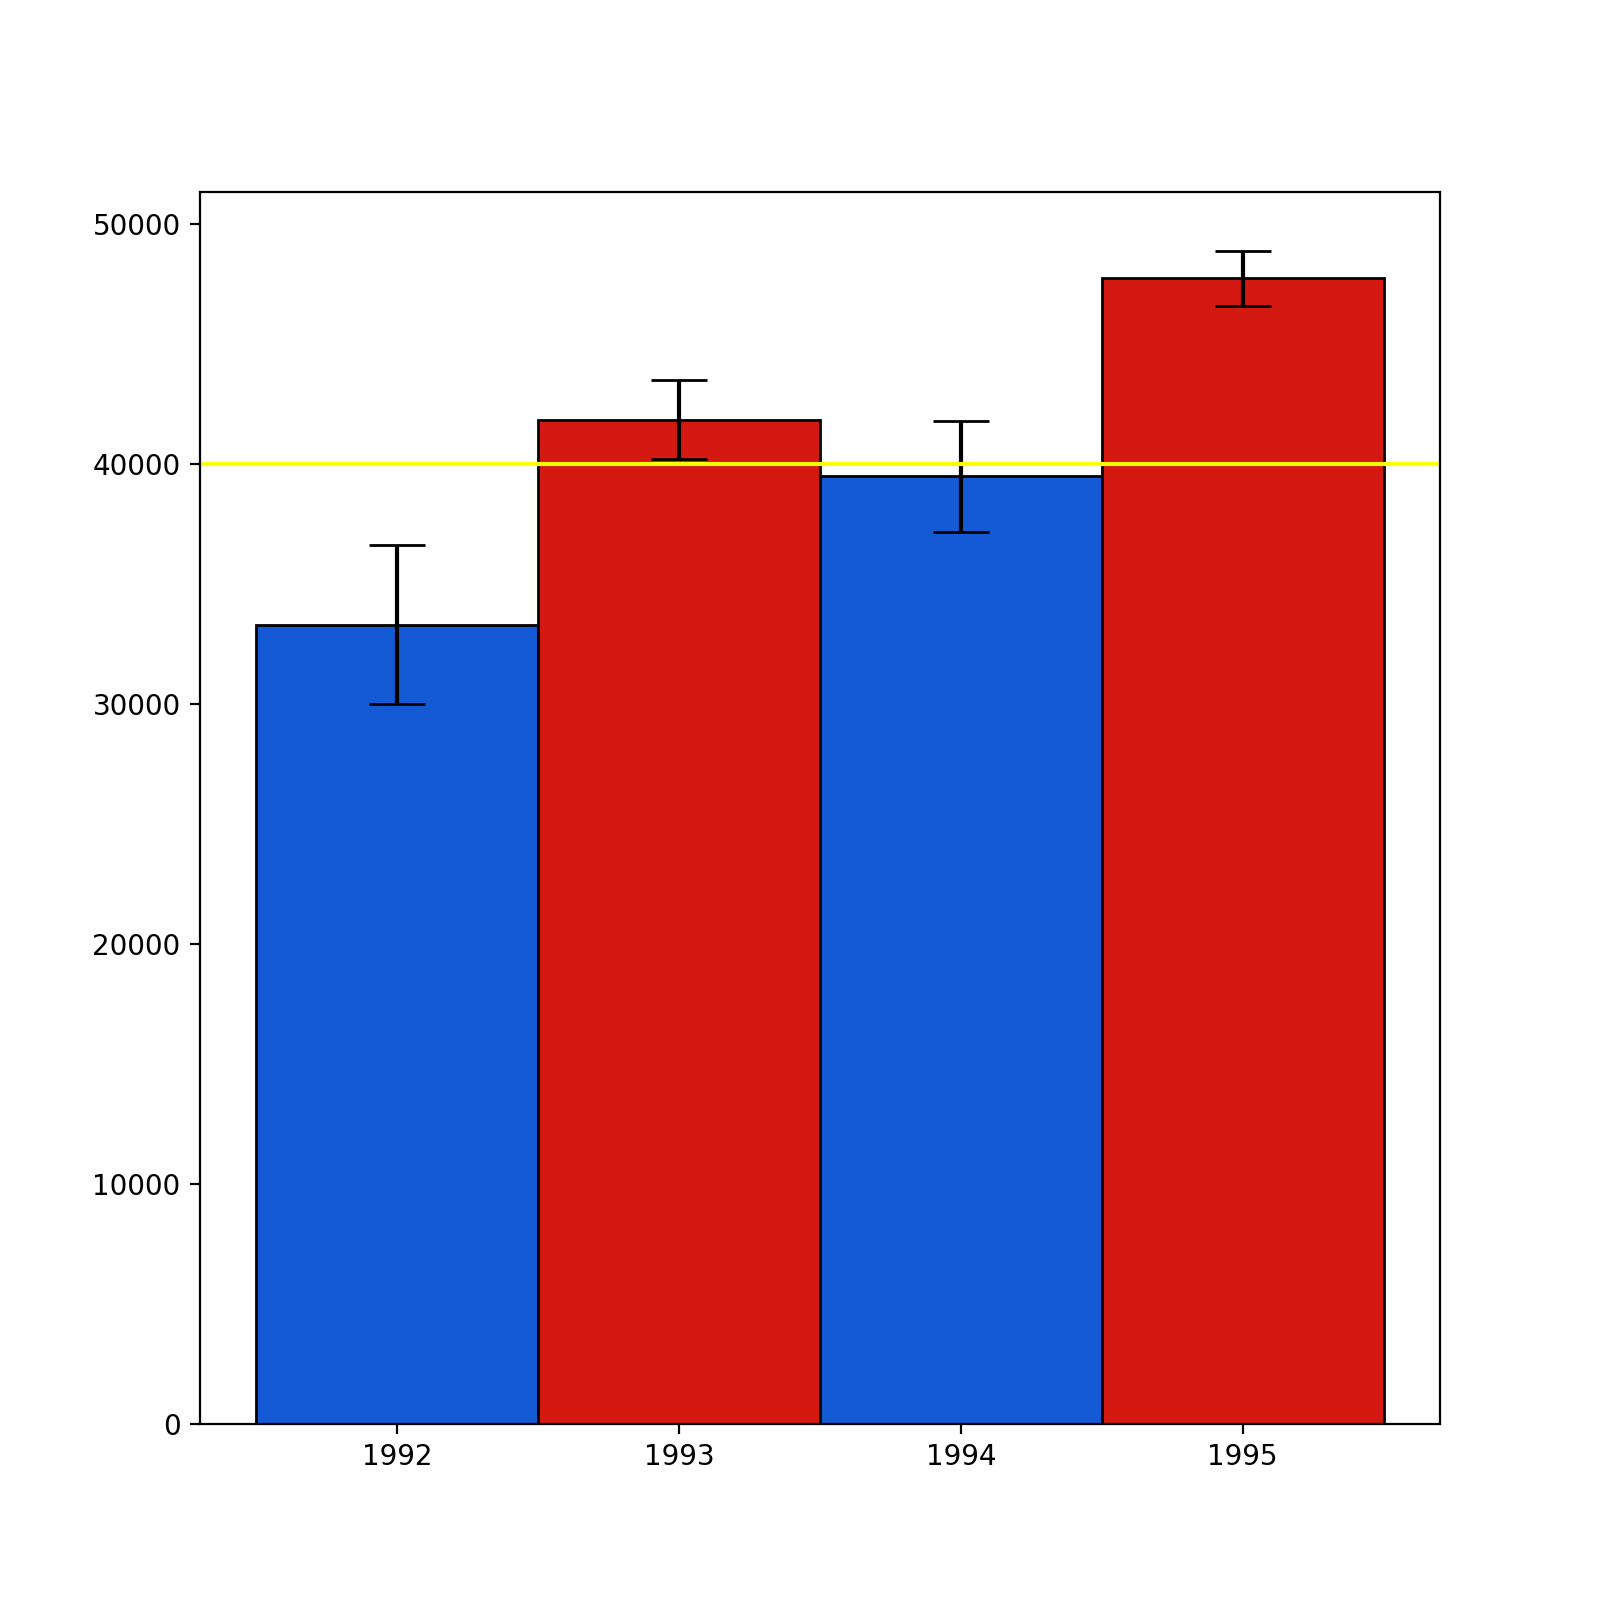

In [3]:
df2 = df.transpose()

fig, ax = plt.subplots(figsize=(8, 8))
        
xvals = range(len(df2.columns.tolist()))
means = df2.describe().loc['mean'].tolist() # [33312.10747554433, 41861.85954107339, 39493.3049413989, 47743.55096926713]
width = 1
standard_error_of_mean = df2.sem(axis=0).tolist()
y = 40000

colors = []
for mean in means:
    if (y-mean) > 0:
        colors.append('#135ad4')
    elif (y-mean) < 0:
        colors.append('#d41913')
    else:
        colors.append('white')

ax.bar(xvals, means, width=1, edgecolor='black', yerr=standard_error_of_mean, capsize=10.0, color=colors)
ax.set_xticks(range(len(df2.columns.tolist())))
ax.set_xticklabels(df2.columns.tolist())
ax.axhline(y, color='yellow')

**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

<IPython.core.display.Javascript object>


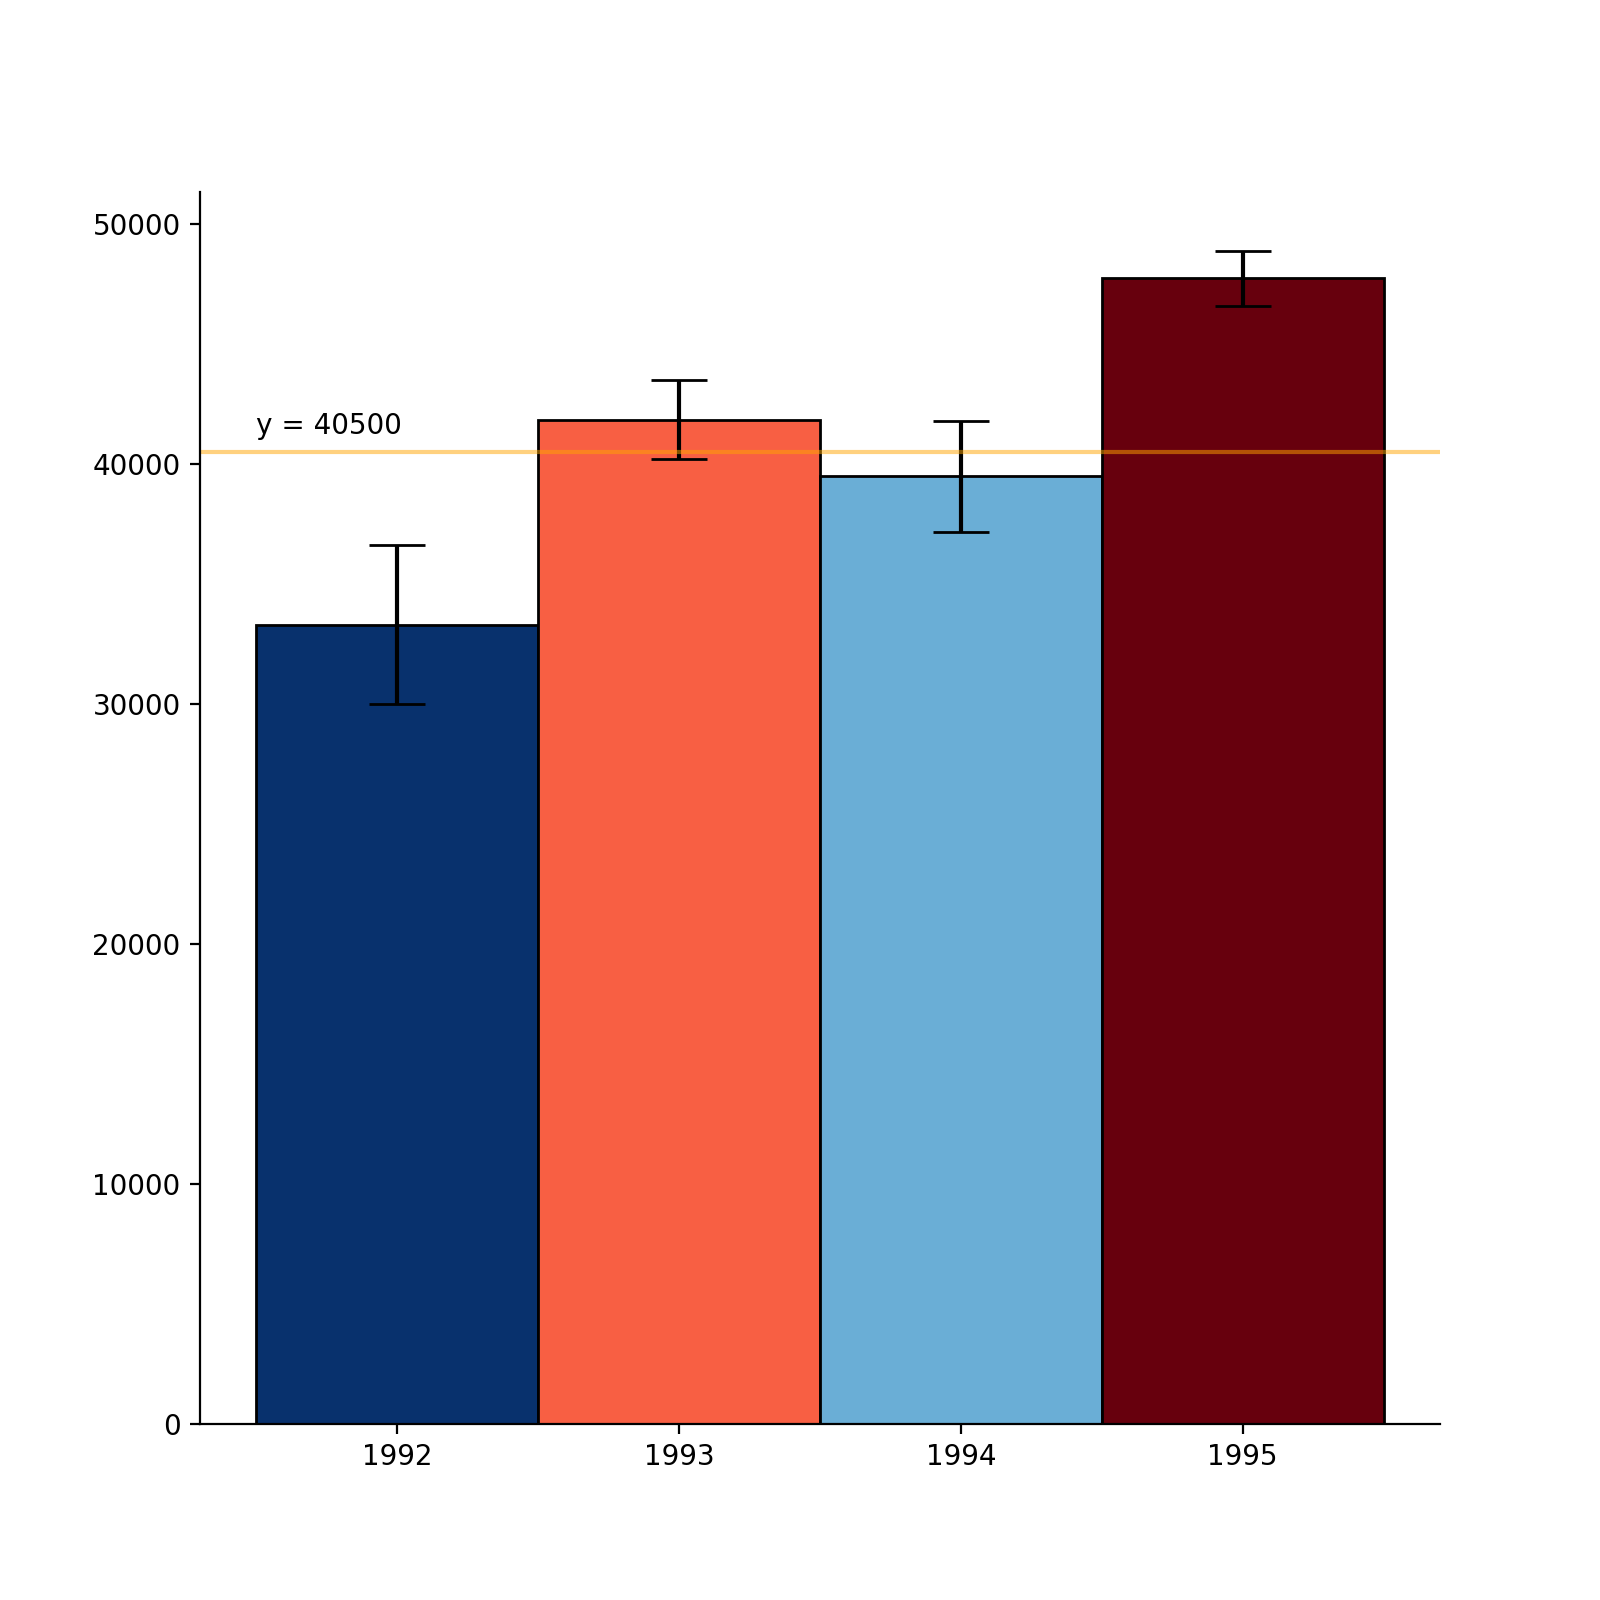

Text(-0.5, 41250, 'y = 40500')

In [4]:
df_diff = pd.DataFrame(df2.mean(), index=[1992, 1993, 1994, 1995], columns=['mean'])

fig, ax = plt.subplots(figsize=(8, 8))
        
xvals = range(len(df2.columns.tolist()))
means = df2.describe().loc['mean'].tolist()
width = 1
standard_error_of_mean = df2.sem(axis=0).tolist()
# set value of y
y = 40500
df_diff['diff'] = df_diff['mean'] - y

# dividing the absolute value of the means (without +/-) by itself, indicates whether
# the number is positive or negative
df_diff['sign'] = df_diff['diff'].abs()/df_diff['diff']

old_range = abs(df_diff['diff']).min(), df_diff['diff'].abs().max() # (506.69505860110075, 7743.550969267133)
new_range = 0.5, 1

# multiple by the remapped values
df_diff['shade'] = df_diff['sign']*np.interp(df_diff['diff'].abs(), old_range, new_range)
df_diff['select_color'] = df_diff['shade'].apply(lambda x: 'white' if x == 0 else 'use reds cmap to get color' if x > 0 else 'use blues cmaps to get color')

shade = df_diff['shade'].tolist()

blues = cm.Blues
reds = cm.Reds

color_list = ['white' if x == 0 else blues(abs(x)) if x < 0 else reds(abs(x)) for x in shade]
ax.bar(xvals, means, width=1, edgecolor='black', yerr=standard_error_of_mean, capsize=10.0, color=color_list)
ax.set_xticks(range(len(df2.columns.tolist())))
ax.set_xticklabels(df2.columns.tolist())
ax.axhline(y, color='orange', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate('y = {}'.format(round(y, 1)), xy=(-0.5, y+750))                                



**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

<IPython.core.display.Javascript object>


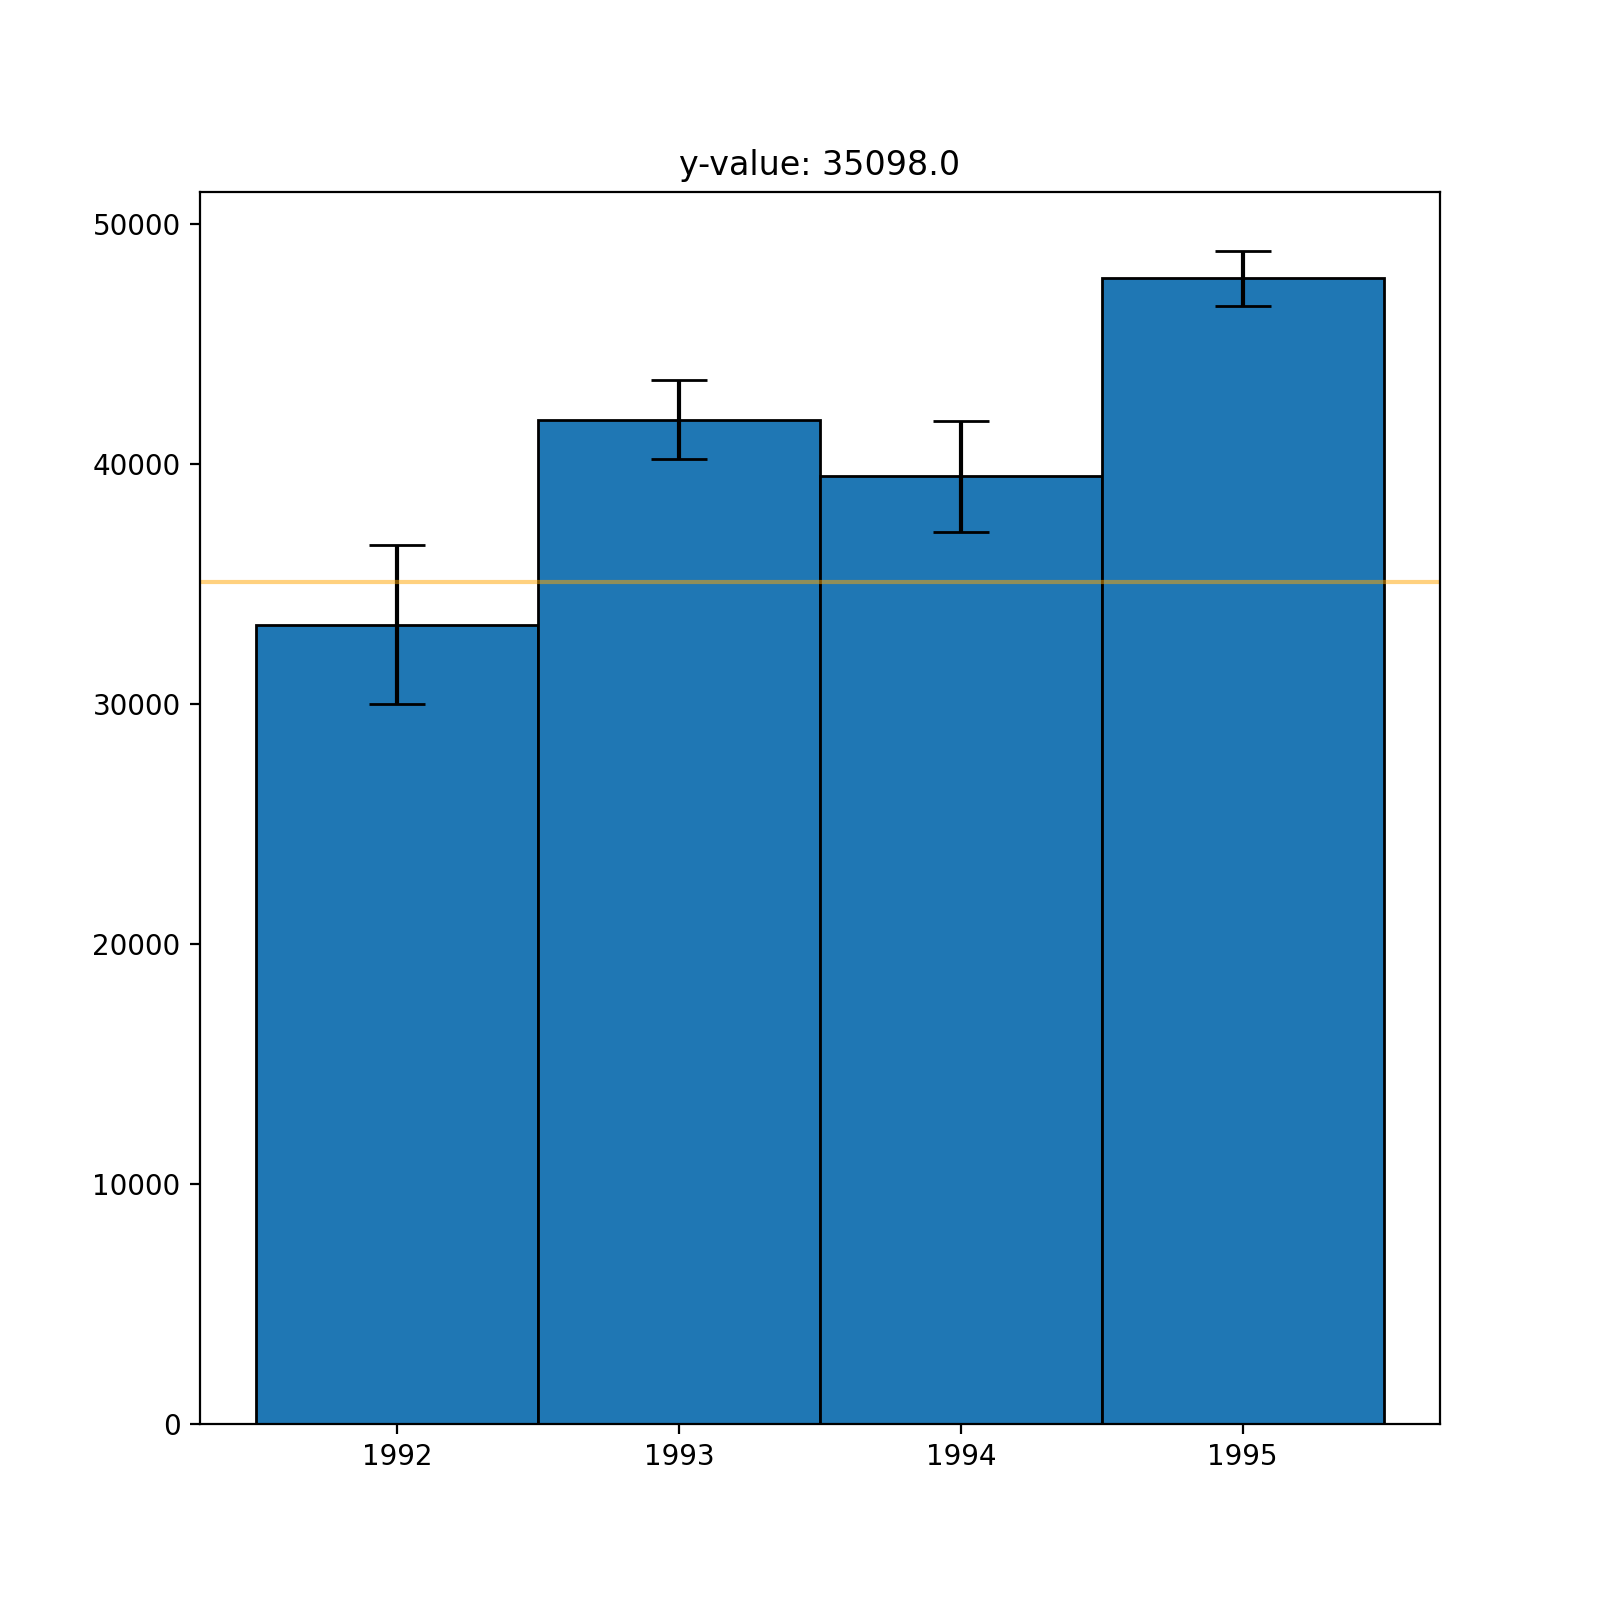

7

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(xvals, means, width=1, edgecolor='black', yerr=standard_error_of_mean, capsize=10.0)


def onclick(event):
    ax.cla()
    ax.bar(xvals, means, width=1, edgecolor='black', yerr=standard_error_of_mean, capsize=10.0)
    ax.set_xticks(range(len(df2.columns.tolist())))
    ax.set_xticklabels(df2.columns.tolist())
    ax.axhline(event.ydata, color='orange', alpha=0.5)
    ax.set_title('y-value: {}'.format(round(event.ydata)))

fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


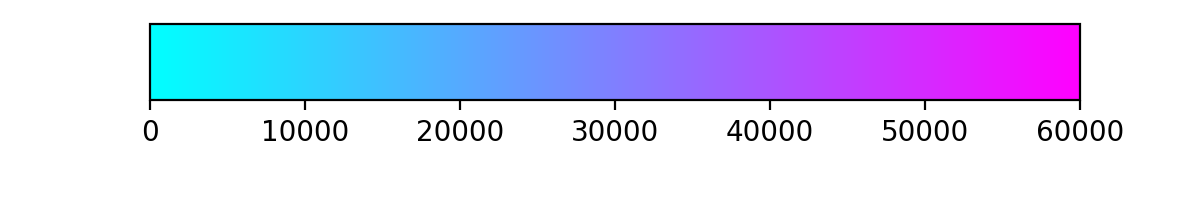

In [12]:
# creating a customzied colorbar

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=60000)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')

[[0.050383 0.029803 0.527975 1.      ]
 [0.32515  0.006915 0.639512 1.      ]
 [0.546157 0.038954 0.64701  1.      ]
 [0.723444 0.196158 0.538981 1.      ]
 [0.85975  0.360588 0.406917 1.      ]
 [0.95547  0.533093 0.28549  1.      ]
 [0.994495 0.74088  0.166335 1.      ]
 [0.940015 0.975158 0.131326 1.      ]]


<IPython.core.display.Javascript object>


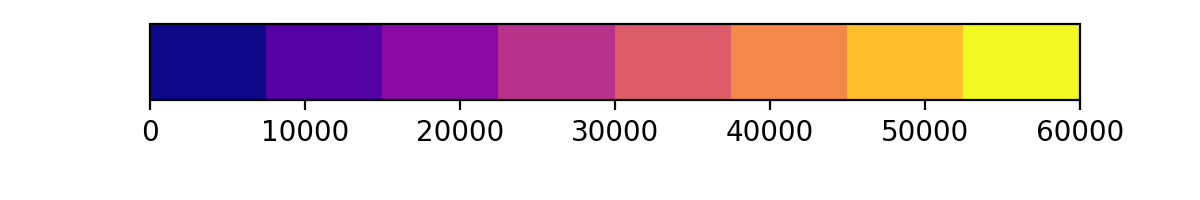

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('plasma', 8)
print(viridis.colors)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = viridis
norm = mpl.colors.Normalize(vmin=0, vmax=60000)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')